## __Classification: Data Pre-Processing__

In [12]:
## importing necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

import cv2
from PIL import Image

# from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import RandomRotation, RandomContrast, RandomTranslation, RandomBrightness, RandomFlip    
from tensorflow.keras.models import Sequential

In [3]:
## setting up the images directory

images_dir = '../data/classification'

print(os.listdir(images_dir))

['0', '1', '2', '3', '4', '5', '6', '7', '8']


In [6]:
## loading dataset with 9 classses stored in 9 independent lists with 9 lists of labels
## the dataset is stored in a folder called "dataset" in the current working directory

def load_dataset(i):
    dataset = []
    labels = []
    
    path = images_dir + '/' + str(i)
    files = os.listdir(path)
    for file in files:
        file_path = os.path.join(path, file)
        img = cv2.imread(file_path)
        if img is None:
            continue
        img = cv2.resize(img, (224, 224))
        dataset.append(img)
        labels.append(i)
    return np.array(dataset), np.array(labels)


In [7]:
class_0, labels_0 = load_dataset(0)
class_1, labels_1 = load_dataset(1)
class_2, labels_2 = load_dataset(2)
class_3, labels_3 = load_dataset(3)
class_4, labels_4 = load_dataset(4)
class_5, labels_5 = load_dataset(5)
class_6, labels_6 = load_dataset(6)
class_7, labels_7 = load_dataset(7)
class_8, labels_8 = load_dataset(8)

In [13]:
data_augmentation = Sequential([
  RandomRotation(0.1),
  RandomContrast(0.1),
  RandomBrightness(0.1),
  RandomTranslation(0.15, 0.15),
  RandomFlip('horizontal')
])

data_augmentation_reduced = Sequential([
  RandomContrast(0.1),
  RandomBrightness(0.1),
  RandomTranslation(0.15, 0.15)
])

In [14]:
def augment(train_images, train_labels):
    augmented_images = []
    augmented_labels = []
    for i in range(train_images.shape[0]):
        augmented_images.append(train_images[i])
        augmented_labels.append(train_labels[i])
        for j in range(4):
            augmented_images.append(data_augmentation(train_images[i]))
            augmented_labels.append(train_labels[i])
    return np.array(augmented_images), np.array(augmented_labels)

def augment_low_low(train_images, train_labels):
    augmented_images = []
    augmented_labels = []
    for i in range(train_images.shape[0]):
        augmented_images.append(train_images[i])
        augmented_labels.append(train_labels[i])
        for j in range(4):
            augmented_images.append(data_augmentation_reduced(train_images[i]))
            augmented_labels.append(train_labels[i])
    return np.array(augmented_images), np.array(augmented_labels)

def augment_more_low(train_images, train_labels):
    augmented_images = []
    augmented_labels = []
    for i in range(train_images.shape[0]):
        augmented_images.append(train_images[i])
        augmented_labels.append(train_labels[i])
        for j in range(7):
            augmented_images.append(data_augmentation_reduced(train_images[i]))
            augmented_labels.append(train_labels[i])
    return np.array(augmented_images), np.array(augmented_labels)

def augment_much_more(train_images, train_labels):
    augmented_images = []
    augmented_labels = []
    for i in range(train_images.shape[0]):
        augmented_images.append(train_images[i])
        augmented_labels.append(train_labels[i])
        for j in range(15):
            augmented_images.append(data_augmentation(train_images[i]))
            augmented_labels.append(train_labels[i])
    return np.array(augmented_images), np.array(augmented_labels)

In [15]:
def normalize(train_images):
    return train_images / 255.0

In [16]:
class_0, labels_0 = augment(class_0, labels_0)
class_1, labels_1 = augment_more_low(class_1, labels_1)
class_2, labels_2 = augment_low_low(class_2, labels_2)
class_3, labels_3 = augment(class_3, labels_3)
class_4, labels_4 = augment(class_4, labels_4)
class_5, labels_5 = augment(class_5, labels_5)
class_6, labels_6 = augment(class_6, labels_6)
class_7, labels_7 = augment(class_7, labels_7)
class_8, labels_8 = augment_much_more(class_8, labels_8)

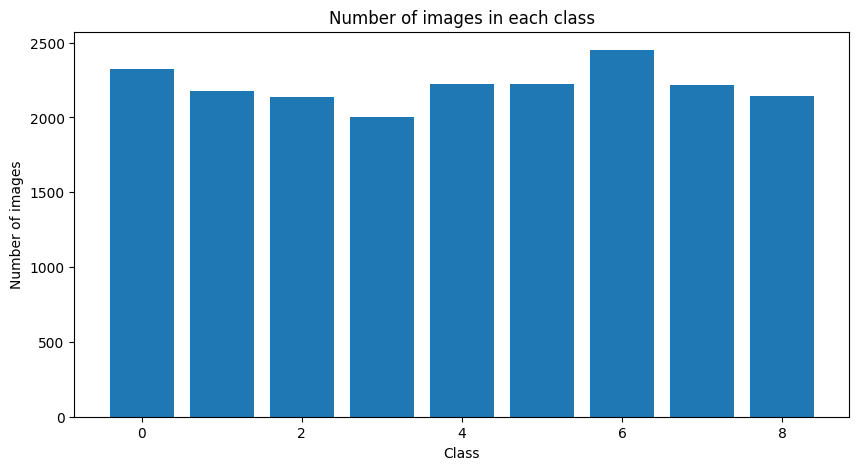

In [17]:
## plotting number of images in each class

plt.figure(figsize=(10, 5))
plt.bar(range(9), [len(labels_0), len(labels_1), len(labels_2), len(labels_3), len(labels_4), len(labels_5), len(labels_6), len(labels_7), len(labels_8)])
plt.xlabel('Class')
plt.ylabel('Number of images')
plt.title('Number of images in each class')
plt.show()

In [ ]:
X = np.concatenate((class_0, class_1, class_2, class_3, class_4, class_5, class_6, class_7, class_8))
y = np.concatenate((labels_0, labels_1, labels_2, labels_3, labels_4, labels_5, labels_6, labels_7, labels_8))
X.shape, y.shape

In [ ]:
X = normalize(X)

In [ ]:
## splitting the dataset into training and testing sets

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)